In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost
from xgboost import XGBClassifier, plot_importance
import lightgbm
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE 

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [6]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


### Checking for the missing values

In [7]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

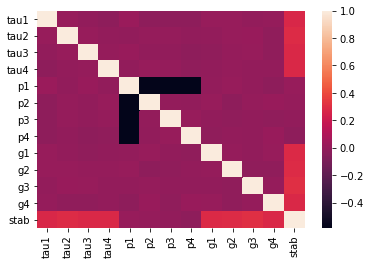

In [10]:
#Checking the correlation between the features
corr = df.corr()
sns.heatmap(corr)

In [8]:
#Droping the unneeded feature wich is 'stab'
df1 = df.drop(['stab'], axis=1)

In [11]:
df1['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

### Plotting the distribution of the target column

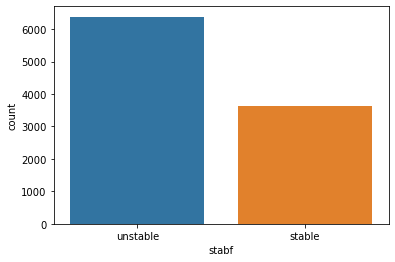

In [12]:
sns.countplot(x='stabf', data=df1)

In [13]:
features = df1.drop(['stabf'], axis=1)
target = df1[['stabf']]

### Splitting the data frame into train and test set

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

### Standardize the train and test data

In [15]:
scaler = StandardScaler()
stand_train = scaler.fit_transform(x_train)
stand_test = scaler.fit_transform(x_test)

In [16]:
stand_train = pd.DataFrame(stand_train, columns= x_train.columns)
stand_test = pd.DataFrame(stand_test, columns= x_test.columns)

### Train of RandomForest classifier

In [17]:
rfc = RandomForestClassifier(random_state=1)
rfc_model = rfc.fit(stand_train, y_train)
rfc_pred = rfc_model.predict(stand_test)
print("Accurancy RFC: {}".format(accuracy_score(y_true=y_test, y_pred=rfc_pred).round(4)))
print("Precision: {}".format(precision_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')))
print("Recall: {}".format(recall_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')))
print("F1: {}".format(f1_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')))

<ipython-input-17-09bb31cb9598>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model = rfc.fit(stand_train, y_train)


Accurancy RFC: 0.928
Precision: 0.9176470588235294
Recall: 0.8764044943820225
F1: 0.896551724137931


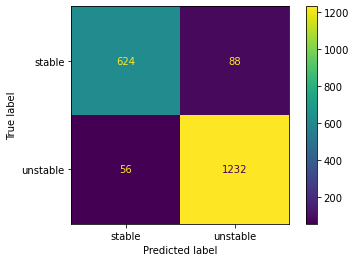

In [18]:
# Plotting the confusion matrix
plot_confusion_matrix(rfc_model, stand_test, y_test)

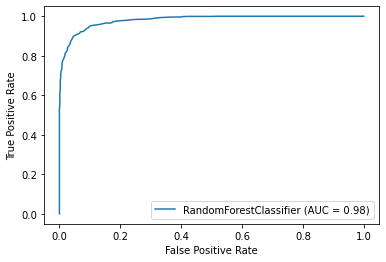

In [19]:
# Plotting the ROC cover
plot_roc_curve(rfc_model,stand_test, y_test)

### Training the Extra Trees Classifier

In [20]:
etc = ExtraTreesClassifier(random_state=1)
etc_model = etc.fit(stand_train, y_train)
etc_pred = etc_model.predict(stand_test)
print("Accurancy ETC: {}".format(accuracy_score(y_true=y_test, y_pred=etc_pred).round(3)))
# print(classification_report(y_test, etc_pred, digits=3))
# print("Accurancy RFC: {}".format(accuracy_score(y_true=y_test, y_pred=etc_pred)))
print("Precision: {}".format(precision_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')))
print("Recall: {}".format(recall_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')))
print("F1: {}".format(f1_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')))

<ipython-input-20-c3d7913297e6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etc_model = etc.fit(stand_train, y_train)


Accurancy ETC: 0.926
Precision: 0.940625
Recall: 0.8455056179775281
F1: 0.8905325443786982


### Train XGBoost classifier

In [21]:
xgb = XGBClassifier(random_state=1)
xgb_model = xgb.fit(stand_train, y_train)
xgb_pred = xgb_model.predict(stand_test)
print("Accurancy XGB: {}".format(accuracy_score(y_true=y_test, y_pred=xgb_pred).round(4)))
print("Precision: {}".format(precision_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable').round(3)))
print("Recall: {}".format(recall_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable').round(3)))
print("F1: {}".format(f1_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable').round(3)))

C:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accurancy XGB: 0.946
Precision: 0.938
Recall: 0.909
F1: 0.923


### Hyperparameter search on the extra trees classifier

In [22]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [23]:
# Use random search cross validation to find the hyperparameters
random_search_hyper = RandomizedSearchCV(etc, hyperparameter_grid, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [24]:
best_model_grid = random_search_hyper.fit(stand_train, y_train)
print(best_model_grid.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.9s finished
C:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


ExtraTreesClassifier(max_features='log2', min_samples_split=5, n_estimators=500,
                     random_state=1)


In [25]:
best_pred = best_model_grid.predict(stand_test)
print("Accurancy Extra best: {}".format(accuracy_score(y_true=y_test, y_pred=best_pred)))
print("Precision: {}".format(precision_score(y_true=y_test, y_pred=best_pred, pos_label='stable').round(3)))
print("Recall: {}".format(recall_score(y_true=y_test, y_pred=best_pred, pos_label='stable').round(3)))
print("F1: {}".format(f1_score(y_true=y_test, y_pred=best_pred, pos_label='stable').round(3)))

Accurancy Extra best: 0.9295
Precision: 0.969
Recall: 0.829
F1: 0.893


### The feature importance on the optimal extra trees classifier

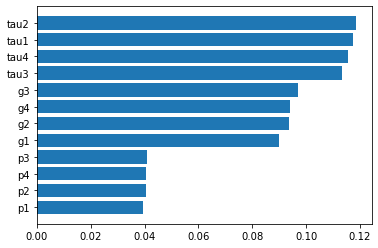

In [27]:
featuress = stand_train.columns
importance = etc.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)),[featuress[i] for i in indices])
plt.show()

### Training lightgbm model

In [28]:
lightg = LGBMClassifier(random_state=1)
lightg_model = lightg.fit(stand_train, y_train)
lightg_pred = lightg_model.predict(stand_test)
print("Accurancy Light: {}".format(accuracy_score(y_true=y_test, y_pred=lightg_pred).round(4)))
print("Precision: {}".format(precision_score(y_true=y_test, y_pred=lightg_pred, pos_label='stable').round(3)))
print("Recall: {}".format(recall_score(y_true=y_test, y_pred=lightg_pred, pos_label='stable').round(3)))
print("F1: {}".format(f1_score(y_true=y_test, y_pred=lightg_pred, pos_label='stable').round(3)))

C:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accurancy Light: 0.9355
Precision: 0.924
Recall: 0.892
F1: 0.908
